<a href="https://colab.research.google.com/github/AemyJutt/IndianHousingDataAnalysis/blob/main/IndianHousesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IndianHousingAnalysis By Ahmad Raza

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('IndianHouses.csv')

In [ ]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


# Data Preprocessing Part 1

In [ ]:
df.select_dtypes(include='object').nunique()

Furnishing       3
Locality       365
Status           2
Transaction      2
Type             2
dtype: int64

In [ ]:
df['Locality']

0                                        Rohini Sector 25
1                  J R Designers Floors, Rohini Sector 24
2                     Citizen Apartment, Rohini Sector 13
3                                        Rohini Sector 24
4       Rohini Sector 24 carpet area 650 sqft status R...
                              ...                        
1254                                    Chittaranjan Park
1255                                    Chittaranjan Park
1256                                    Chittaranjan Park
1257                            Chittaranjan Park Block A
1258                                    Chittaranjan Park
Name: Locality, Length: 1259, dtype: object

In [ ]:
#we dont need deep information of locality we need main detail as i split in feature
df['Locality'].str.split(' ').str[1]

0           Sector
1                R
2       Apartment,
3           Sector
4           Sector
           ...    
1254          Park
1255          Park
1256          Park
1257          Park
1258          Park
Name: Locality, Length: 1259, dtype: object

In [ ]:
df['Locality'] = df['Locality'].str.split(' ').str[1]

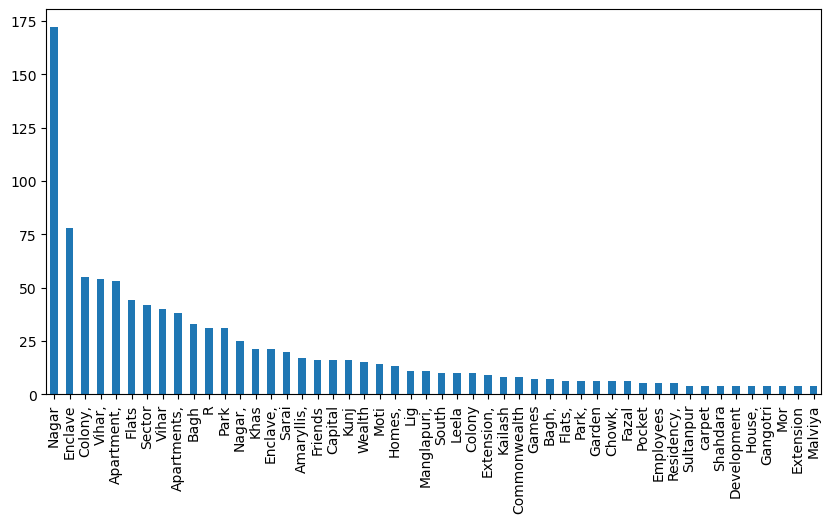

In [ ]:
#using split string funtion we split and got less number of unique values but we need top 30
plt.figure(figsize=(10,5))
df['Locality'].value_counts().head(50).plot(kind='bar')
plt.show()

In [ ]:
df['Locality'].nunique()

119

In [ ]:
#the number opf unique values is less than nefore but we cant handle it so we drop it
df.drop('Locality',axis=1,inplace=True)

# Handle Missing Values

In [ ]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [ ]:
#we fill nan values by mean because of numerical values
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Per_Sqft'].mean())

In [ ]:
#we fill nan values by mode because of categorical values
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].mode()[0])
df['Parking'] = df['Parking'].fillna(df['Parking'].mode()[0])
df['Furnishing'] = df['Furnishing'].fillna(df['Furnishing'].mode()[0])
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])

# Handle DataTypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1259 non-null   float64
 3   Furnishing   1259 non-null   object 
 4   Parking      1259 non-null   float64
 5   Price        1259 non-null   int64  
 6   Status       1259 non-null   object 
 7   Transaction  1259 non-null   object 
 8   Type         1259 non-null   object 
 9   Per_Sqft     1259 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 98.5+ KB


In [ ]:
df['Bathroom'] = df['Bathroom'].astype('int')

In [ ]:
df['Parking'] = df['Parking'].astype('int')

# Exploratary Data Analysis

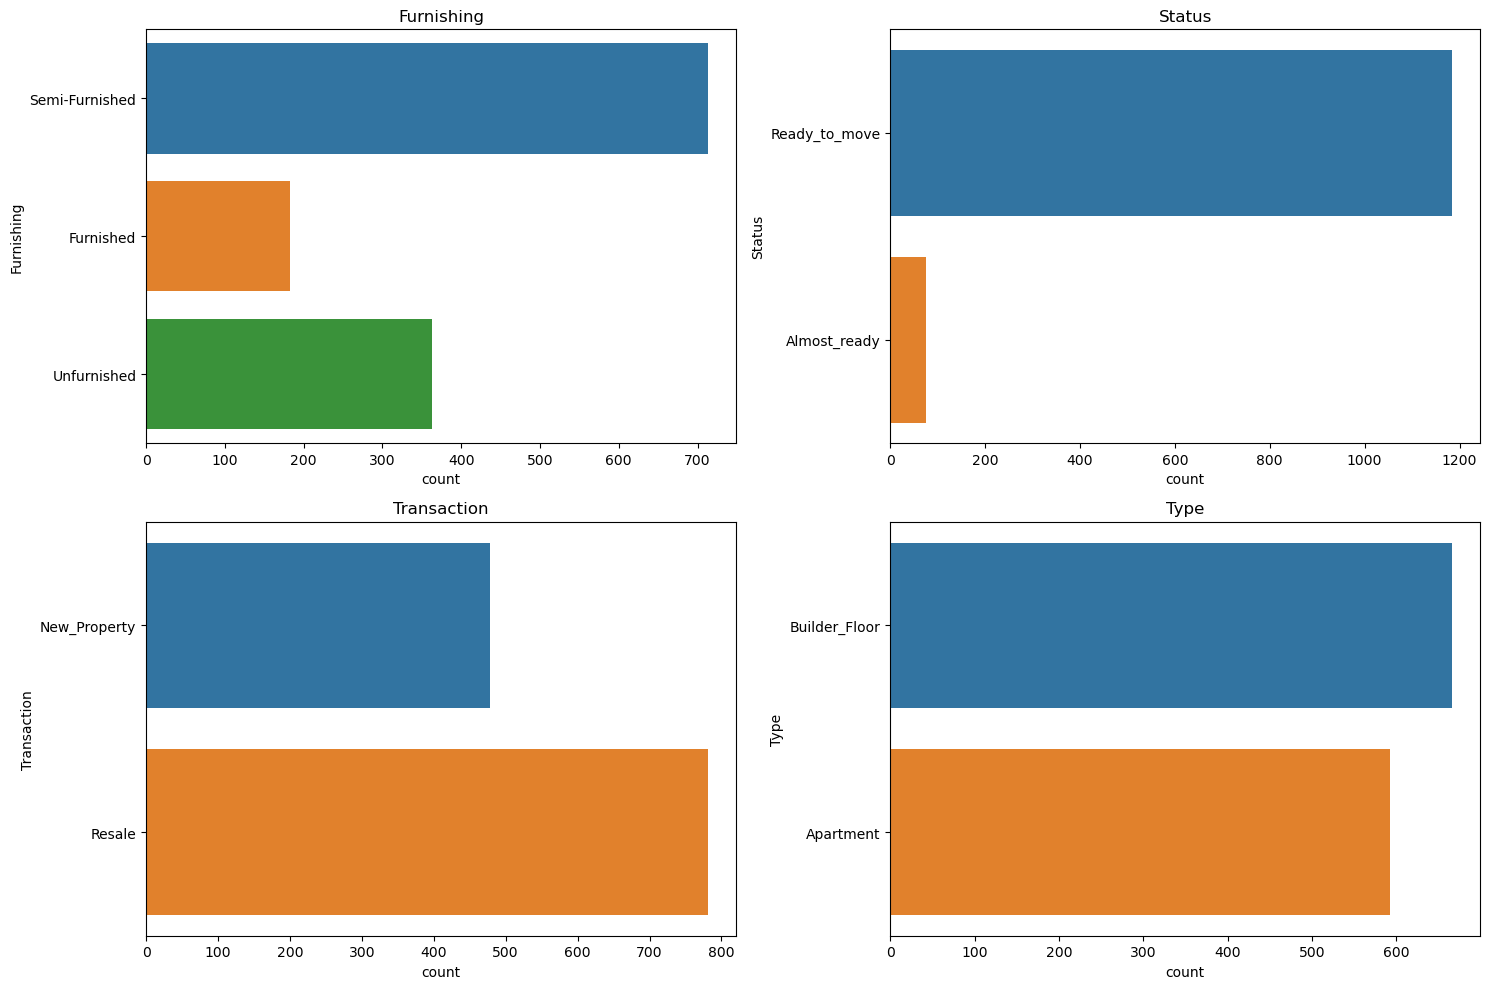

In [ ]:
cat_vars = ['Furnishing','Status','Transaction','Type']

num_cols = len(cat_vars)

fig , axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
axs = axs.flatten()

for i , var in enumerate (cat_vars):
    sns.countplot(y=var,data=df,ax=axs[i])
    axs[i].set_title(var)

if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

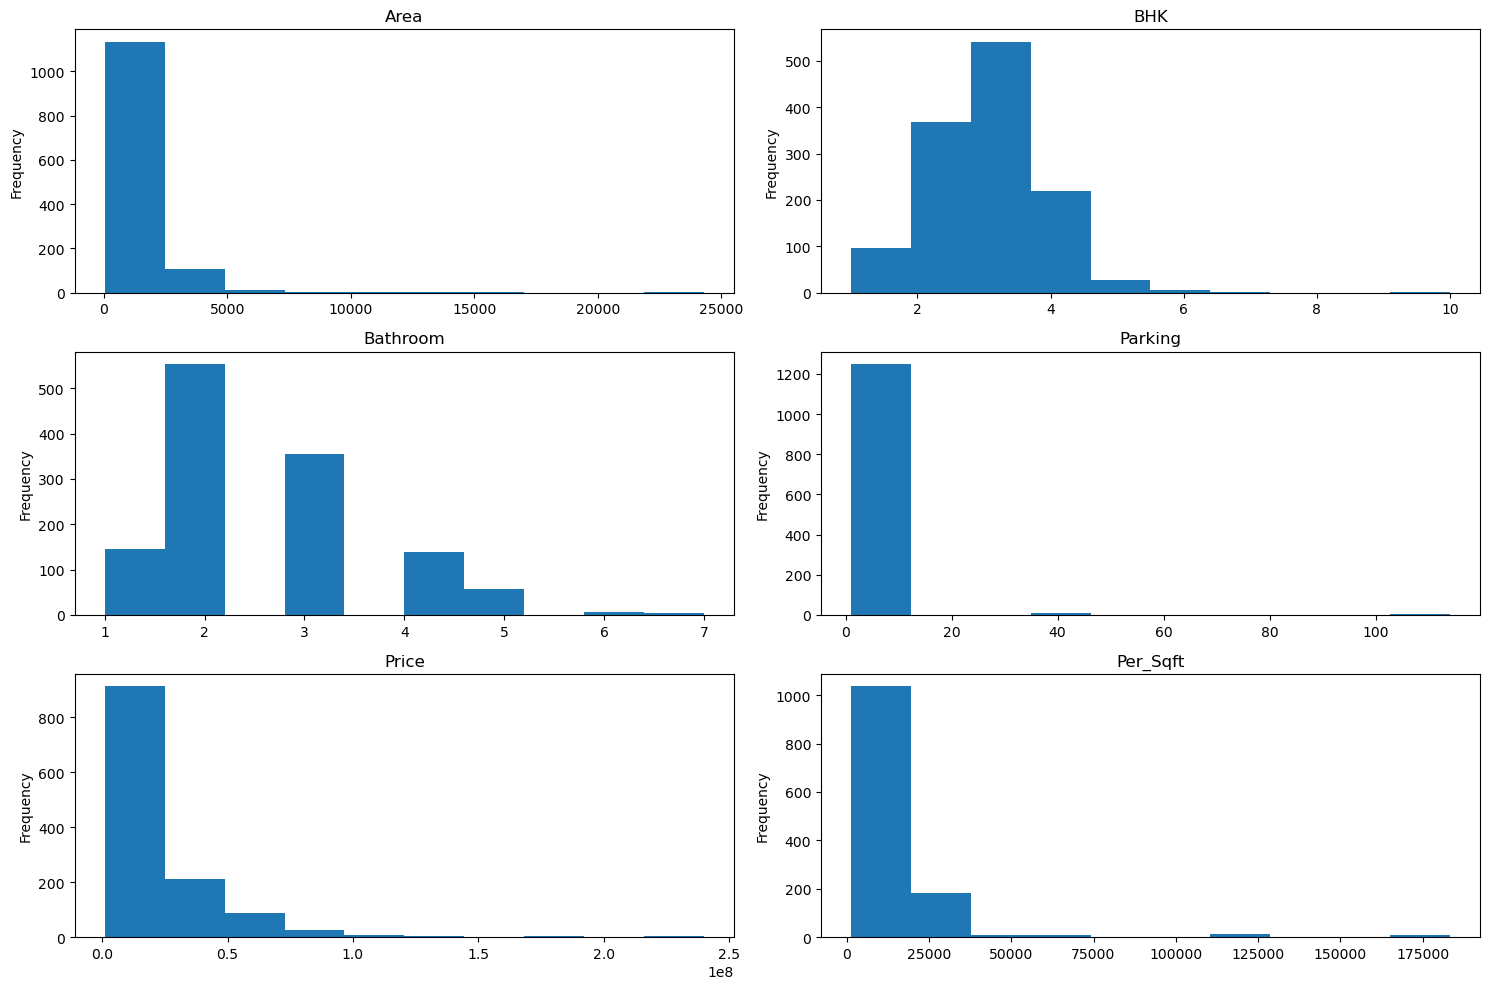

In [ ]:
int_vars = df.select_dtypes(include=['int','float'])

num_cols = len(int_vars)

fig , axs = plt.subplots(nrows=3,ncols=2,figsize=(15,10))
axs = axs.flatten()

for i , var in enumerate (int_vars):
    df[var].plot(kind='hist',ax=axs[i])
    axs[i].set_title(var)

if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

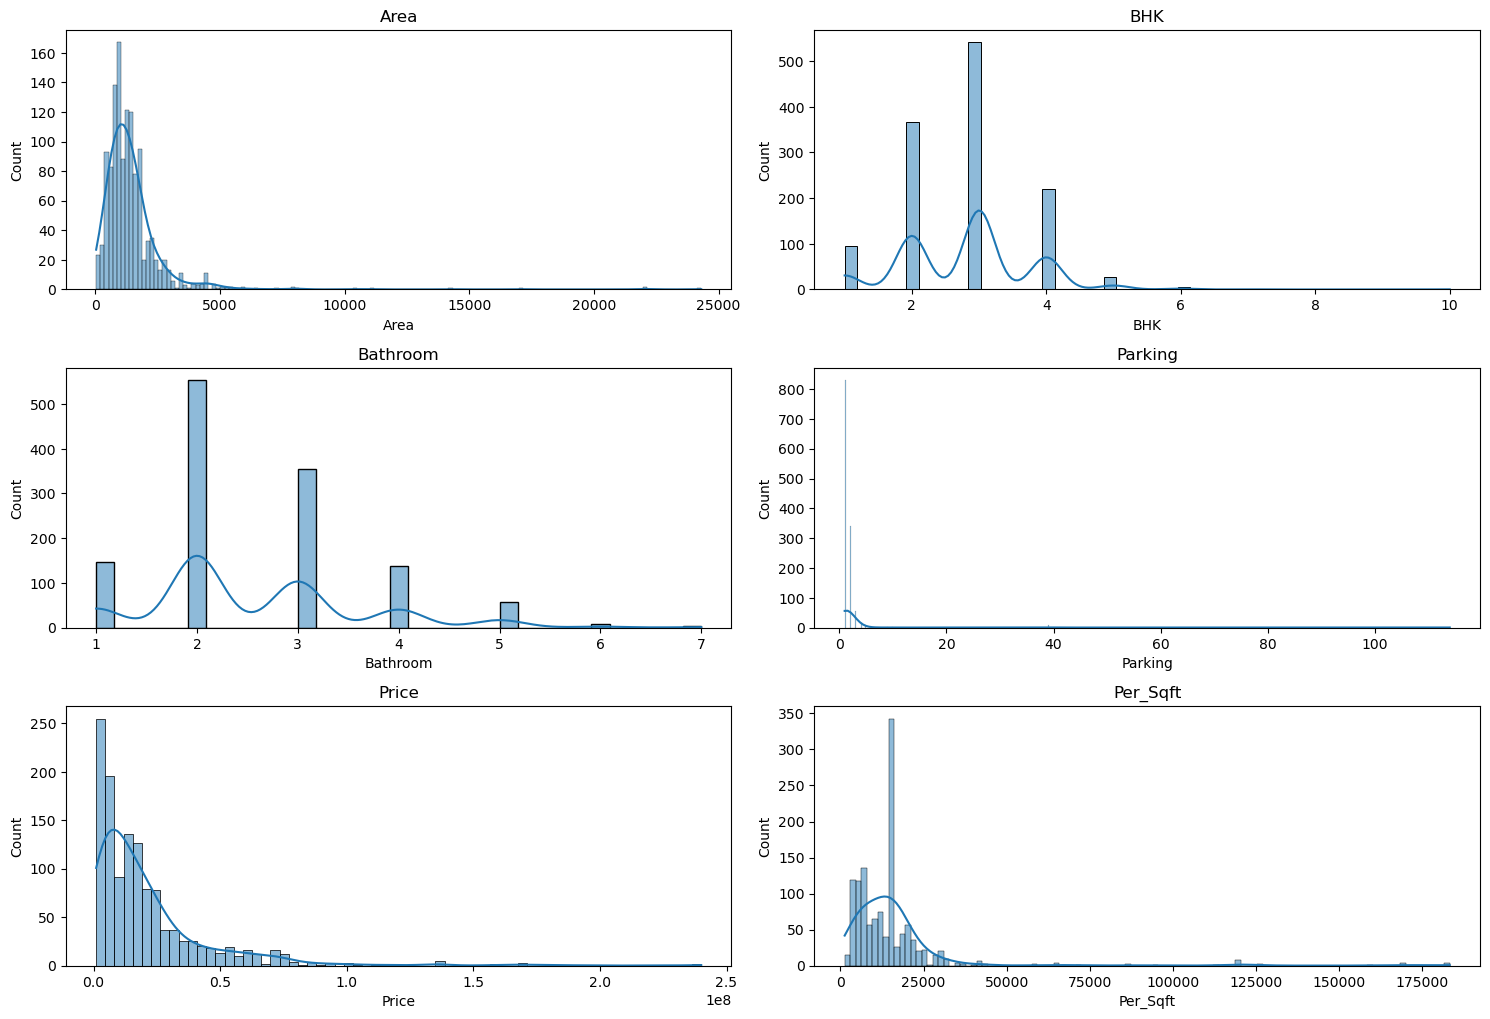

In [ ]:
#exploratary data anaylsis with kde(kernal density estimation)
num = df.select_dtypes(include=['int','float']).columns.tolist()
col = len(num)

fig , axs = plt.subplots(nrows=col,ncols=2,figsize=(15,20))
axs = axs.flatten()

for i , var in enumerate (num):
    sns.histplot(data=df,x=var,kde=True,ax=axs[i])
    axs[i].set_title(var)

if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

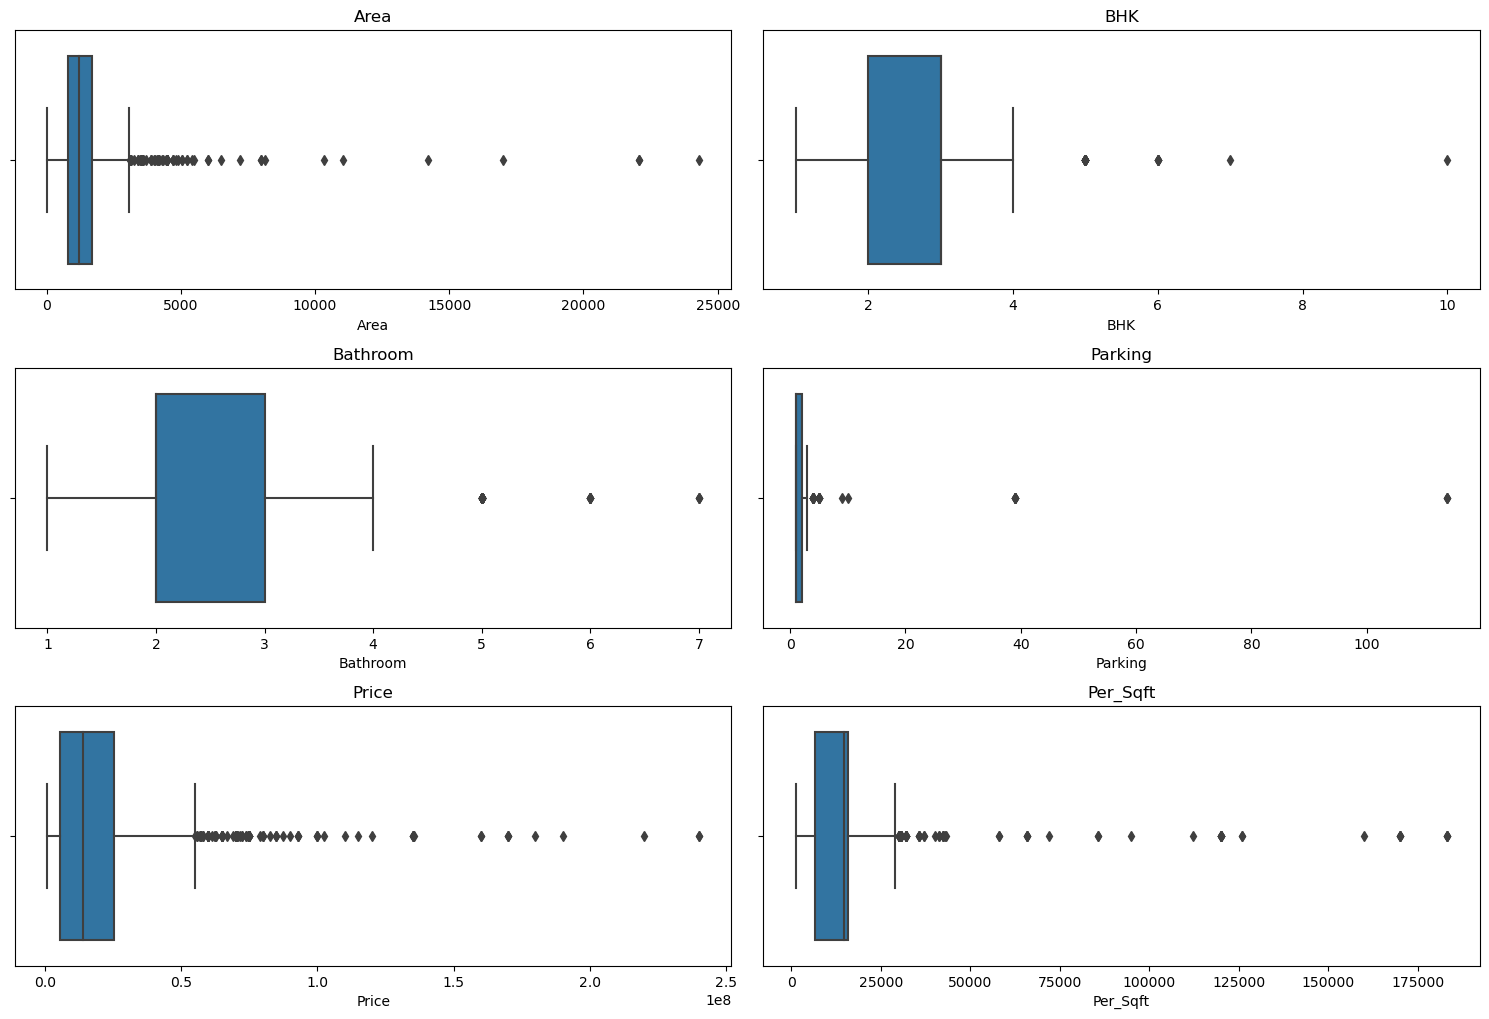

In [ ]:
#exploratary data anaylsis with boxplot to indentity outliers
num = df.select_dtypes(include=['int','float']).columns.tolist()
col = len(num)

fig , axs = plt.subplots(nrows=col,ncols=2,figsize=(15,20))
axs = axs.flatten()

for i , var in enumerate (num):
    sns.boxplot(data=df,x=var,ax=axs[i])
    axs[i].set_title(var)

if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

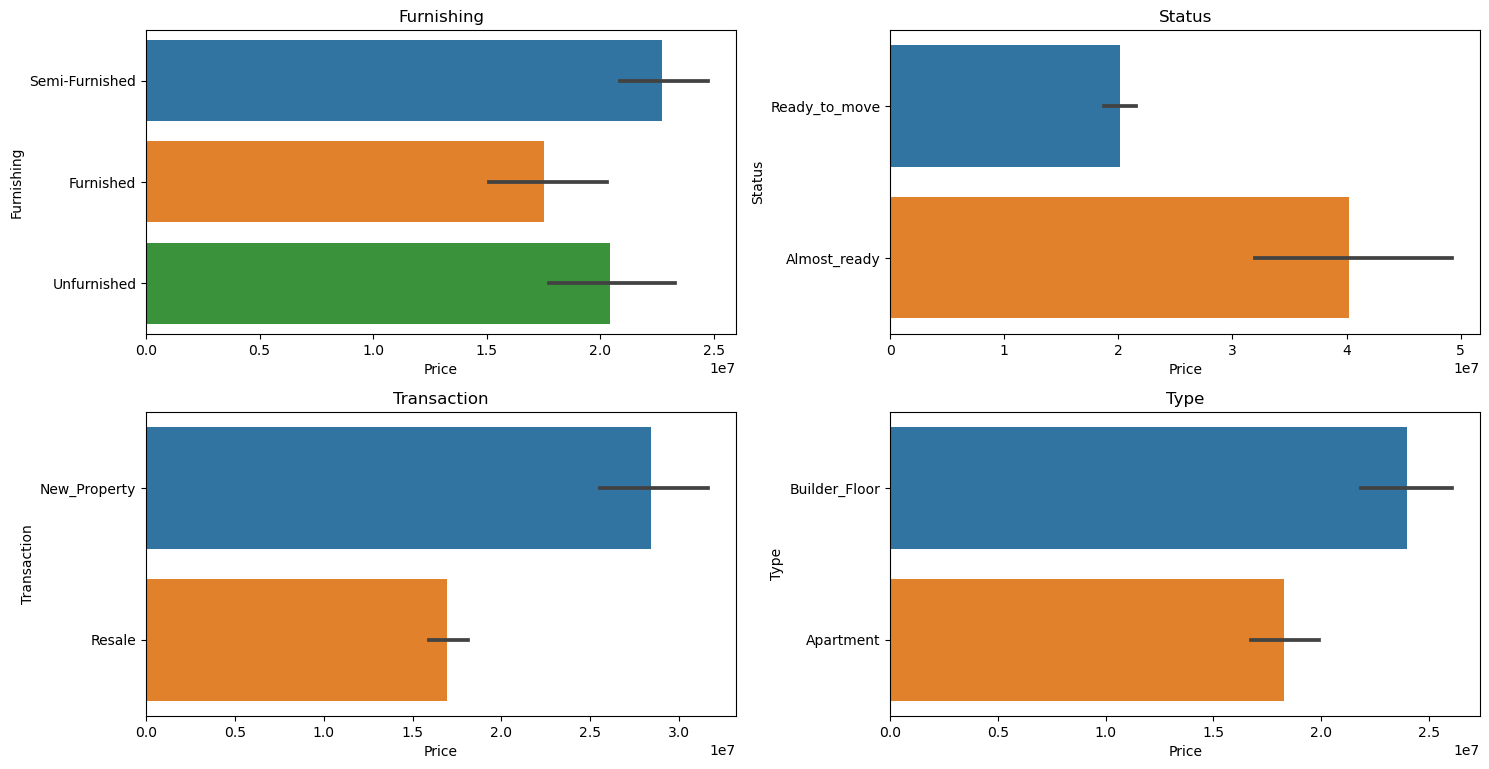

In [ ]:
#eda using dependent feature price
cat = ['Furnishing','Status','Transaction','Type']
col = len(cat)
fig, axs = plt.subplots(nrows=col,ncols=2,figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate (cat):
    sns.barplot(x='Price', y=var, data=df, ax=axs[i])
    axs[i].set_title(var)

if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

# Data Preprocessing Part 2

In [ ]:
#eda using dependent feature price
cat = ['Furnishing','Status','Transaction','Type']
col = len(cat)
fig, axs = plt.subplots(nrows=col,ncols=2,figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate (cat):
    sns.barplot(x='Price', y=var, data=df, ax=axs[i])
    axs[i].set_title(var)

if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

Furnishing: ['Semi-Furnished' 'Furnished' 'Unfurnished']
Status: ['Ready_to_move' 'Almost_ready']
Transaction: ['New_Property' 'Resale']
Type: ['Builder_Floor' 'Apartment']


In [ ]:
#encoded all values by labelencoder
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f'{col} : {df[col].unique()}')

Furnishing : [1 0 2]
Status : [1 0]
Transaction : [0 1]
Type : [1 0]


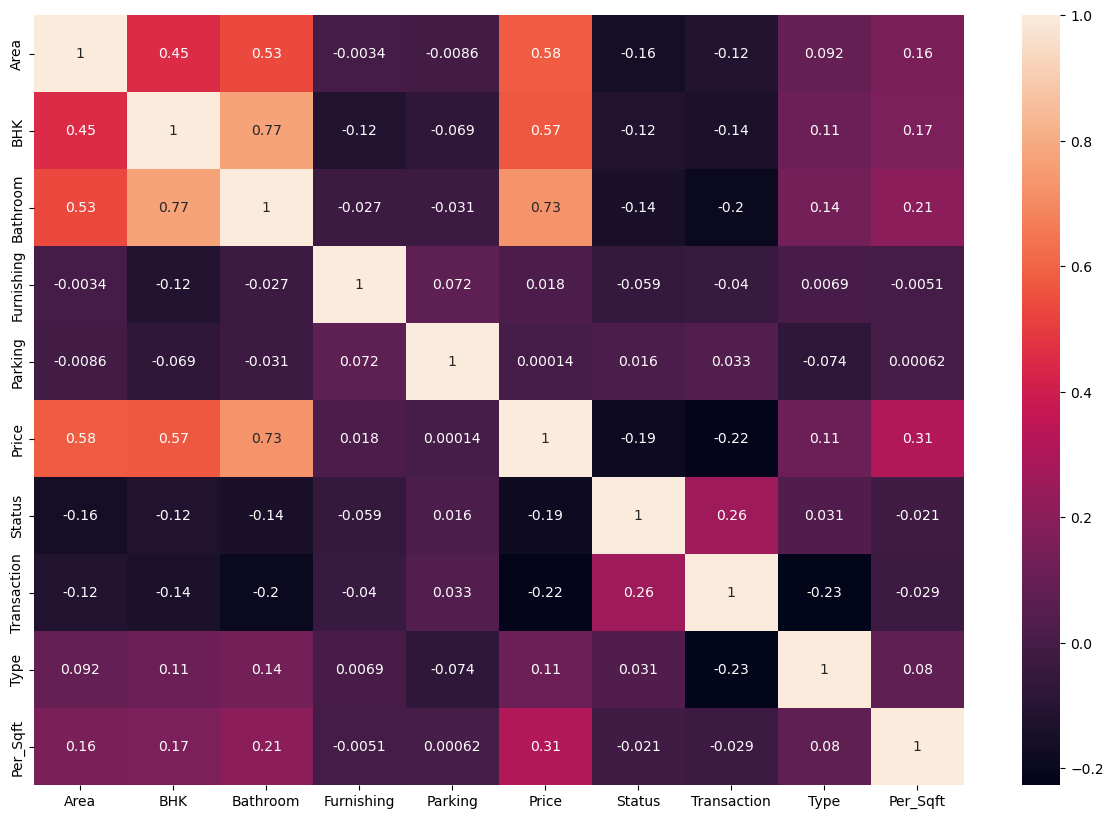

In [ ]:
#co_relation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True)
plt.show()